In [1]:
import numpy as np, matplotlib.pyplot as plt, os
import tools21cm as t2c, py21cmfast as p21c
from py21cmfast import plotting
import random, zipfile
from astropy.cosmology import FlatLambdaCDM
from tqdm import tqdm

import matplotlib.gridspec as gridspec

from itertools import permutations
from datetime import datetime

# create seed for 21cmFast
str_seed = [var for var in datetime.now().strftime('%d%H%M%S')]
np.random.shuffle(str_seed)
seed = int(''.join(str_seed))

#outpath = '/home/michele/Documents/PhD_Sussex/output/ML/dataset/inputs/test_predict/'
outpath = '/home/michele/Documents/PhD_Sussex/output/ML/dataset/outputs/new/02-10T23-52-36_128slice/predictions_1/layers_output/'

In [2]:
eff_fact = random.gauss(52.5, 20.)
Rmfp = random.gauss(12.5, 5.)
Tvir = random.gauss(4.65, 0.5)

str_seed = [var for var in datetime.now().strftime('%d%H%M%S')]
np.random.shuffle(str_seed)
seed = int(''.join(str_seed))

print(eff_fact, Rmfp, Tvir, seed)

52.04110076936052 11.763457688295103 4.559050070207565 18100603


In [3]:
#zeta = 65.204
#Rmfp = 11.861
#Tvir = 4.539

params = {'HII_DIM':128, 'DIM':384, 'BOX_LEN':256}
my_ext = [0, params['BOX_LEN'], 0, params['BOX_LEN']]
c_params = {'OMm':0.27, 'OMb':0.046, 'SIGMA_8':0.82, 'POWER_INDEX':0.96}
a_params = {'HII_EFF_FACTOR':eff_fact, 'R_BUBBLE_MAX':Rmfp, 'ION_Tvir_MIN':Tvir}

lightcone = p21c.run_lightcone(redshift=7.0, max_redshift=12.0, astro_params=a_params, cosmo_params=c_params, user_params=params, lightcone_quantities=("brightness_temp", 'xH_box'), direc='_cache', random_seed=20223)


In [4]:
dataLC, redshiftLC = lightcone.brightness_temp, lightcone.lightcone_redshifts
dataLC_xH = lightcone.xH_box

## Create Lightcone
Here we create the 21cmFast cube outputs 

In [ ]:
zeta = 65.204
Rmfp = 11.861
Tvir = 4.539

params = {'HII_DIM':128, 'DIM':384, 'BOX_LEN':256}
my_ext = [0, params['BOX_LEN'], 0, params['BOX_LEN']]
c_params = {'OMm':0.27, 'OMb':0.046, 'SIGMA_8':0.82, 'POWER_INDEX':0.96}
a_params = {'HII_EFF_FACTOR':zeta, 'R_BUBBLE_MAX':Rmfp, 'ION_Tvir_MIN':Tvir}
cosmo = FlatLambdaCDM(H0=70., Ob0=c_params['OMb'], Om0=c_params['OMm'])

#if not (os.path.exists(outpath+'dataLC.bin')):
if not (False):
    print('Create Lightcone data')
    lightcone = p21c.run_lightcone(redshift=7.0, max_redshift=12.0, astro_params=a_params, cosmo_params=c_params, user_params=params, lightcone_quantities=("brightness_temp", 'xH_box'), direc='/home/michele/21CMMC_Boxes', random_seed=2020, cleanup=True) 

    dataLC, redshiftLC = lightcone.brightness_temp, lightcone.lightcone_redshifts
    dataLC_xH = lightcone.xH_box

    t2c.save_cbin(outpath+'dataLC.bin', dataLC)
    np.savetxt(outpath+'redshiftLC.txt', redshiftLC)
    t2c.save_cbin(outpath+'dataLC_xH.bin', dataLC_xH)
else:
    print('Open Lightcone data')
    dataLC = t2c.read_cbin(outpath+'dataLC.bin')
    redshiftLC = np.loadtxt(outpath+'redshiftLC.txt')
    dataLC_xH = t2c.read_cbin(outpath+'dataLC_xH.bin')


print('zeta = %.3f  R_mfp = %.3f  T_vir = %.3f' %(zeta, Rmfp, Tvir))

Create Lightcone data


In [5]:
uvfile = '/home/michele/Documents/PhD_Sussex/output/ML/dataset/inputs/uvmap_128_z7-20.pkl'
if not (os.path.exists(uvfile)):
    print('uv-map pickle not found')

## Plot $x_{HI}$ and $\delta T_b$ Lightcone 

In [7]:
LC_xH, _ = t2c.smooth_lightcone(lightcone=dataLC_xH, z_array=redshiftLC, box_size_mpc=params['BOX_LEN'])
mask_LCxH = (LC_xH>0.5).astype(int)

In [8]:
LC1 = t2c.subtract_mean_signal(dataLC, los_axis=2)
noise_cone = t2c.noise_lightcone(ncells=LC1.shape[0], zs=redshiftLC, obs_time=1000, boxsize=params['BOX_LEN'], n_jobs=1, save_uvmap=uvfile)
LC3, redshiftLC3 = t2c.smooth_lightcone(lightcone=LC1+noise_cone, z_array=redshiftLC, box_size_mpc=params['BOX_LEN'])

All or some uv maps is read from the given file. Be sure that they were run with the same parameter values as provided now.
Creating the uv maps.

z = 7.000 | 0.15 % completed | Elapsed time: 0.00 mins

z = 7.005 | 0.31 % completed | Elapsed time: 0.00 mins

z = 7.011 | 0.46 % completed | Elapsed time: 0.00 mins

z = 7.016 | 0.62 % completed | Elapsed time: 0.00 mins

z = 7.021 | 0.77 % completed | Elapsed time: 0.00 mins

z = 7.027 | 0.93 % completed | Elapsed time: 0.00 mins

z = 7.032 | 1.08 % completed | Elapsed time: 0.00 mins

z = 7.038 | 1.23 % completed | Elapsed time: 0.00 mins

z = 7.043 | 1.39 % completed | Elapsed time: 0.00 mins

z = 7.048 | 1.54 % completed | Elapsed time: 0.00 mins

z = 7.054 | 1.70 % completed | Elapsed time: 0.00 mins

z = 7.059 | 1.85 % completed | Elapsed time: 0.00 mins

z = 7.065 | 2.01 % completed | Elapsed time: 0.00 mins

z = 7.070 | 2.16 % completed | Elapsed time: 0.00 mins

z = 7.075 | 2.31 % completed | Elapsed time: 0.00 mins

z = 7.081 | 2


z = 7.19055 | 5.56 % completed

z = 7.19610 | 5.71 % completed

z = 7.20165 | 5.86 % completed

z = 7.20720 | 6.02 % completed

z = 7.21276 | 6.17 % completed

z = 7.21833 | 6.33 % completed

z = 7.22390 | 6.48 % completed

z = 7.22948 | 6.64 % completed

z = 7.23506 | 6.79 % completed

z = 7.24065 | 6.94 % completed

z = 7.24624 | 7.10 % completed

z = 7.25184 | 7.25 % completed

z = 7.25745 | 7.41 % completed

z = 7.26306 | 7.56 % completed

z = 7.26868 | 7.72 % completed

z = 7.27430 | 7.87 % completed

z = 7.27993 | 8.02 % completed

z = 7.28556 | 8.18 % completed

z = 7.29120 | 8.33 % completed

z = 7.29685 | 8.49 % completed

z = 7.30250 | 8.64 % completed

z = 7.30816 | 8.80 % completed

z = 7.31382 | 8.95 % completed

z = 7.31949 | 9.10 % completed

z = 7.32516 | 9.26 % completed

z = 7.33084 | 9.41 % completed

z = 7.33653 | 9.57 % completed

z = 7.34222 | 9.72 % completed

z = 7.34792 | 9.88 % completed

z = 7.35362 | 10.03 % completed

z = 7.35933 | 10.19 % completed

z = 7


z = 8.79452 | 44.60 % completed

z = 8.80177 | 44.75 % completed

z = 8.80902 | 44.91 % completed

z = 8.81628 | 45.06 % completed

z = 8.82355 | 45.22 % completed

z = 8.83083 | 45.37 % completed

z = 8.83811 | 45.52 % completed

z = 8.84540 | 45.68 % completed

z = 8.85270 | 45.83 % completed

z = 8.86001 | 45.99 % completed

z = 8.86733 | 46.14 % completed

z = 8.87465 | 46.30 % completed

z = 8.88199 | 46.45 % completed

z = 8.88933 | 46.60 % completed

z = 8.89668 | 46.76 % completed

z = 8.90403 | 46.91 % completed

z = 8.91140 | 47.07 % completed

z = 8.91877 | 47.22 % completed

z = 8.92616 | 47.38 % completed

z = 8.93355 | 47.53 % completed

z = 8.94095 | 47.69 % completed

z = 8.94835 | 47.84 % completed

z = 8.95577 | 47.99 % completed

z = 8.96319 | 48.15 % completed

z = 8.97062 | 48.30 % completed

z = 8.97806 | 48.46 % completed

z = 8.98551 | 48.61 % completed

z = 8.99297 | 48.77 % completed

z = 9.00043 | 48.92 % completed

z = 9.00791 | 49.07 % completed

z = 9.015


z = 10.86090 | 82.72 % completed

z = 10.87055 | 82.87 % completed

z = 10.88021 | 83.02 % completed

z = 10.88988 | 83.18 % completed

z = 10.89957 | 83.33 % completed

z = 10.90927 | 83.49 % completed

z = 10.91898 | 83.64 % completed

z = 10.92870 | 83.80 % completed

z = 10.93843 | 83.95 % completed

z = 10.94818 | 84.10 % completed

z = 10.95794 | 84.26 % completed

z = 10.96771 | 84.41 % completed

z = 10.97749 | 84.57 % completed

z = 10.98728 | 84.72 % completed

z = 10.99709 | 84.88 % completed

z = 11.00691 | 85.03 % completed

z = 11.01674 | 85.19 % completed

z = 11.02658 | 85.34 % completed

z = 11.03643 | 85.49 % completed

z = 11.04630 | 85.65 % completed

z = 11.05618 | 85.80 % completed

z = 11.06607 | 85.96 % completed

z = 11.07597 | 86.11 % completed

z = 11.08588 | 86.27 % completed

z = 11.09581 | 86.42 % completed

z = 11.10575 | 86.57 % completed

z = 11.11570 | 86.73 % completed

z = 11.12567 | 86.88 % completed

z = 11.13564 | 87.04 % completed

z = 11.14563 

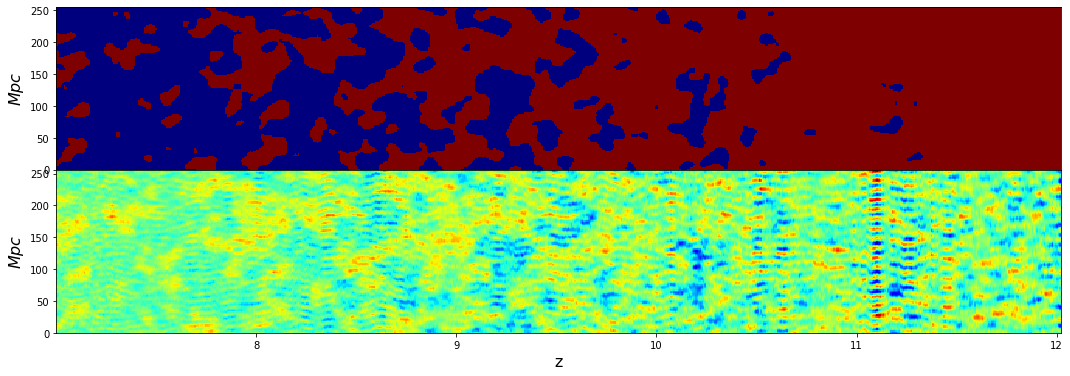

<Figure size 432x288 with 0 Axes>

In [9]:
#my_ext = [z_to_nu(z_quad[0]), z_to_nu(z_quad[-1]), 0, 500/0.7]     # freq axis
my_ext = [redshiftLC.min(), redshiftLC.max(), 0, params['BOX_LEN']]

fig, axes = plt.subplots(figsize=(18, 6))
gs = gridspec.GridSpec(2, 1)

ax0 = plt.subplot(gs[0])
im = ax0.imshow(mask_LCxH[:,params['HII_DIM']//2,:], origin='lower', cmap='jet', aspect='auto', extent=my_ext)
ax0.set_ylabel('$Mpc$', size=16)
#ax0.tick_params(axis='both', length=7, width=1.5)
#plt.text(0.98, 0.95, models.loc['mean', 'name'], size=20, bbox=dict(facecolor='white', alpha=0.7), horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
# THE SECOND SUBPLOT
ax1 = plt.subplot(gs[1])
im = ax1.imshow(LC3[:,params['HII_DIM']//2,:], origin='lower', cmap='jet', aspect='auto', extent=my_ext)
ax1.set_ylabel('$Mpc$', size=16)
#ax1.tick_params(axis='both', length=7, width=1.5)
#plt.text(0.98, 0.95, models.loc['quadfit', 'name'], size=20, bbox=dict(facecolor='white', alpha=0.7), horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
# THE THIRT SUBPLOT
#ax2 = plt.subplot(gs[2])
#im = ax2.imshow(lightcone_scat[:,150,:len(z_quad)], cmap='plasma', extent=my_ext, aspect='auto')
#plt.text(0.98, 0.95, models.loc['scat', 'name'], size=20, bbox=dict(facecolor='white', alpha=0.7), horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
#plt.setp(ax0.get_xticklabels(), visible=False), plt.setp(ax1.get_xticklabels(), visible=False)

#ax1.set_ylabel('$Mpc/h$', size=16)
#ax1.set_xlabel(r'$\nu_{obs}$ [MHz]', size=16)
ax1.set_xlabel('z', size=16)
#ax2.tick_params(axis='both', length=7, width=1.5)

#im.set_clim(0., max([lightcone_mean.max(), lightcone_quad.max(), lightcone_scat.max()]))
#cbar = fig.colorbar(im, cax=fig.add_axes([0.92, 0.15, 0.03, 0.7]))
#cbar.set_label(r'$\delta T_b\,\, [mK]$', size=labels_size*0.8)

plt.subplots_adjust(hspace=0.)
#plt.savefig(work_path+'plotLightcone_dTb.png', bbox_inches='tight')
#plt.savefig('plotLightcone_B2km_dTb.png', bbox_inches='tight')
plt.show()
plt.clf()

In [10]:
mask_LCxH.T.shape

(648, 128, 128)

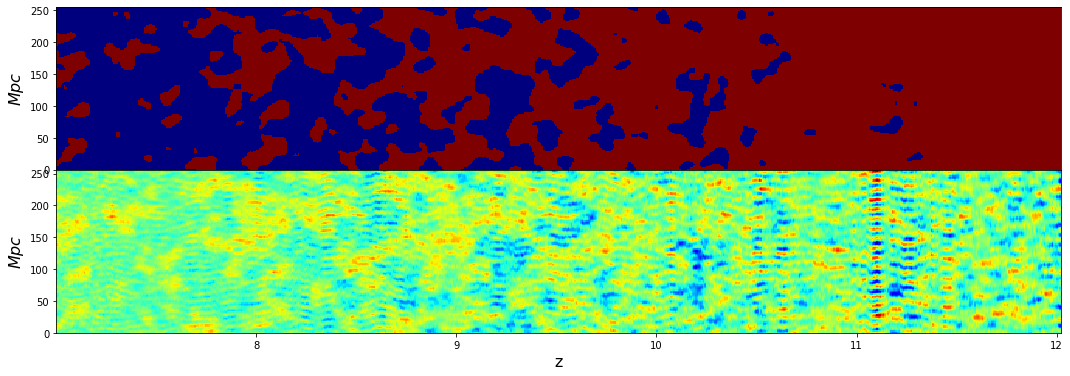

<Figure size 432x288 with 0 Axes>

In [11]:
#my_ext = [z_to_nu(z_quad[0]), z_to_nu(z_quad[-1]), 0, 500/0.7]     # freq axis
my_ext = [redshiftLC.min(), redshiftLC.max(), 0, params['BOX_LEN']]

fig, axes = plt.subplots(figsize=(18, 6))
gs = gridspec.GridSpec(2, 1)

ax0 = plt.subplot(gs[0])
im = ax0.imshow(mask_LCxH[:,params['HII_DIM']//2,:], origin='lower', cmap='jet', aspect='auto', extent=my_ext)
ax0.set_ylabel('$Mpc$', size=16)
#ax0.tick_params(axis='both', length=7, width=1.5)
#plt.text(0.98, 0.95, models.loc['mean', 'name'], size=20, bbox=dict(facecolor='white', alpha=0.7), horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
# THE SECOND SUBPLOT
ax1 = plt.subplot(gs[1])
im = ax1.imshow(LC3[:,params['HII_DIM']//2,:], origin='lower', cmap='jet', aspect='auto', extent=my_ext)
ax1.set_ylabel('$Mpc$', size=16)
#ax1.tick_params(axis='both', length=7, width=1.5)
#plt.text(0.98, 0.95, models.loc['quadfit', 'name'], size=20, bbox=dict(facecolor='white', alpha=0.7), horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
# THE THIRT SUBPLOT
#ax2 = plt.subplot(gs[2])
#im = ax2.imshow(lightcone_scat[:,150,:len(z_quad)], cmap='plasma', extent=my_ext, aspect='auto')
#plt.text(0.98, 0.95, models.loc['scat', 'name'], size=20, bbox=dict(facecolor='white', alpha=0.7), horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
#plt.setp(ax0.get_xticklabels(), visible=False), plt.setp(ax1.get_xticklabels(), visible=False)

#ax1.set_ylabel('$Mpc/h$', size=16)
#ax1.set_xlabel(r'$\nu_{obs}$ [MHz]', size=16)
ax1.set_xlabel('z', size=16)
#ax2.tick_params(axis='both', length=7, width=1.5)

#im.set_clim(0., max([lightcone_mean.max(), lightcone_quad.max(), lightcone_scat.max()]))
#cbar = fig.colorbar(im, cax=fig.add_axes([0.92, 0.15, 0.03, 0.7]))
#cbar.set_label(r'$\delta T_b\,\, [mK]$', size=labels_size*0.8)

plt.subplots_adjust(hspace=0.)
#plt.savefig(work_path+'plotLightcone_dTb.png', bbox_inches='tight')
#plt.savefig('plotLightcone_B2km_dTb.png', bbox_inches='tight')
plt.show()
plt.clf()

## Plot: Slice trough Lightcon


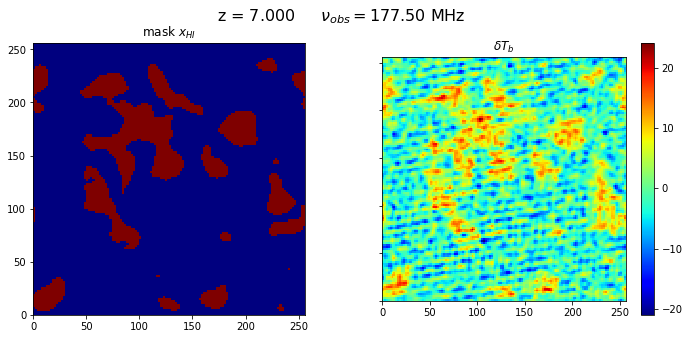

In [12]:
idx = 0 
my_ext = [0, params['BOX_LEN'], 0, params['BOX_LEN']]

#plt.title(r'z = %.3f   $\nu_{obs} = %.2f$ MHz'  %(redshiftLC[idx], t2c.z_to_nu(redshiftLC[idx])))
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
plt.suptitle(r'z = %.3f     $\nu_{obs} = %.2f$ MHz'  %(redshiftLC[idx], t2c.z_to_nu(redshiftLC[idx])), size=16)
axs[0].set_title('mask $x_{HI}$')
axs[0].imshow(mask_LCxH[:,:,idx], origin='lower', cmap='jet', extent=my_ext, interpolation='nearest')
axs[1].set_title('$\delta T_b$')
im = axs[1].imshow(LC3[:,:,idx], origin='lower', cmap='jet', extent=my_ext, interpolation='nearest')
plt.colorbar(im)

## Load SegUnet best model

In [13]:
import matplotlib.pyplot as plt, numpy as np
import tools21cm as t2c
from matplotlib import gridspec

plt.rcParams['font.size'] = 20
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['axes.linewidth'] = 1.2
ls = 22

In [14]:
from tensorflow.keras.models import load_model
from utils_network.metrics import iou, iou_loss, dice_coef, dice_coef_loss, balanced_cross_entropy, phi_coef
from config.net_config import NetworkConfig

def LoadSegUnetModel(cfile):
    avail_metrics = {'binary_accuracy':'binary_accuracy', 'iou':iou, 'dice_coef':dice_coef, 'iou_loss':iou_loss, 'dice_coef_loss':dice_coef_loss, 'phi_coef':phi_coef, 'mse':'mse', 'mae':'mae', 'binary_crossentropy':'binary_crossentropy', 'balanced_cross_entropy':balanced_cross_entropy}
    conf = NetworkConfig(conf_file)

    PATH_OUT = conf.resume_path
    MODEL_EPOCH = conf.best_epoch
    METRICS = [avail_metrics[m] for m in np.append(conf.loss, conf.metrics)]
    cb = {func.__name__:func for func in METRICS if not isinstance(func, str)}
    model_loaded = load_model('%smodel-sem21cm_ep%d.h5' %(PATH_OUT+'checkpoints/', MODEL_EPOCH), custom_objects=cb)
    
    print(' Loaded model:\n %smodel-sem21cm_ep%d.h5' %(conf.resume_path, MODEL_EPOCH))
    return model_loaded

Using TensorFlow backend.


In [17]:
# load model
conf_file = '/home/michele/Documents/PhD_Sussex/output/ML/SegNet/tests/runs/'
#conf_file += 'net2D_201020.ini'
#conf_file += 'net2D_161020.ini'
conf_file += 'net2D_021020.ini'
model = LoadSegUnetModel(conf_file)

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
 Loaded model:
 /home/michele/Documents/PhD_Sussex/output/ML/dataset/outputs/new/02-10T23-52-36_128slice/model-sem21cm_ep56.h5


In [23]:
y = mask_LCxH.astype(int)

# SegUnet 2D
X_seg = np.empty_like(LC3)
for i in tqdm(range(X_seg.shape[-1])):
    X = LC3[:,:,i]
    X = X[np.newaxis, ..., np.newaxis]
    X_seg[:,:,i] = model.predict(X, verbose=0).squeeze()
X_seg = np.round(X_seg).astype(int)

100%|██████████| 648/648 [00:29<00:00, 22.50it/s]


## Calculate Prediction

In [11]:
# SegUnet
from utils.other_utils import RescaleData
from utils_network.prediction import SegUnet21cmPredict

X_tta = SegUnet21cmPredict(unet=model, x=LC3, TTA=True)
X_seg = np.round(np.mean(X_tta, axis=0))

100%|██████████| 16/16 [01:49<00:00,  6.64s/it]


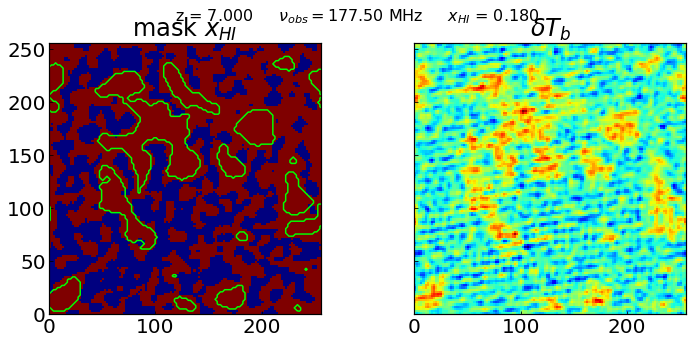

In [46]:
idx = 0
my_ext = [0, params['BOX_LEN'], 0, params['BOX_LEN']]

#plt.title(r'z = %.3f   $\nu_{obs} = %.2f$ MHz'  %(redshiftLC[idx], t2c.z_to_nu(redshiftLC[idx])))
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
plt.suptitle(r'z = %.3f     $\nu_{obs} = %.2f$ MHz     $x_{HI}$ = %.3f'  %(redshiftLC[idx], t2c.z_to_nu(redshiftLC[idx]), np.mean(dataLC_xH[:,:,idx])), size=16)
axs[0].set_title('mask $x_{HI}$')
axs[0].contour(mask_LCxH[:,:,idx], colors='lime', levels=[0.5], extent=my_ext)
axs[0].imshow(X_seg[:,:,idx], origin='lower', cmap='jet', extent=my_ext, interpolation='nearest')
axs[1].set_title('$\delta T_b$')
axs[1].imshow(LC3[:,:,idx], origin='lower', cmap='jet', extent=my_ext, interpolation='nearest')

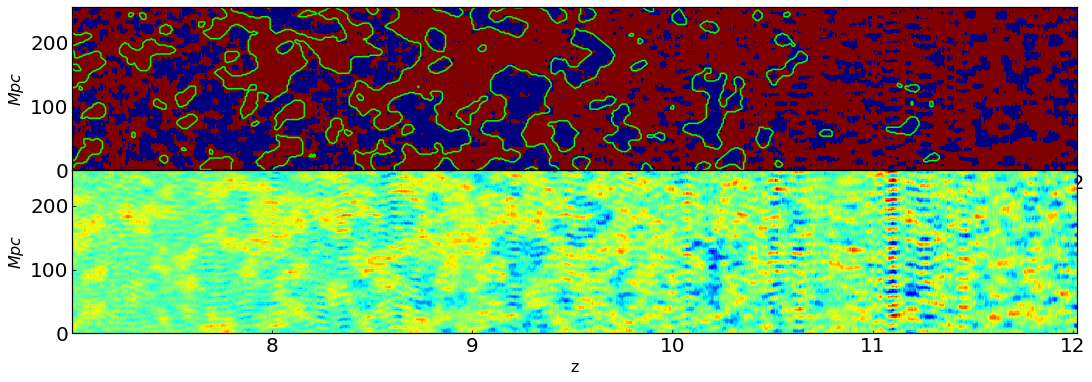

<Figure size 432x288 with 0 Axes>

In [25]:
#my_ext = [z_to_nu(z_quad[0]), z_to_nu(z_quad[-1]), 0, 500/0.7]     # freq axis
my_ext = [redshiftLC.min(), redshiftLC.max(), 0, params['BOX_LEN']]

fig, axes = plt.subplots(figsize=(18, 6))
gs = gridspec.GridSpec(2, 1)

ax0 = plt.subplot(gs[0])
im = ax0.imshow(X_seg[:,params['HII_DIM']//2,:], origin='lower', cmap='jet', aspect='auto', extent=my_ext)
ax0.contour(mask_LCxH[:,params['HII_DIM']//2,:], colors='lime', levels=[0.5], extent=my_ext)

ax0.set_ylabel('$Mpc$', size=16)
#ax0.tick_params(axis='both', length=7, width=1.5)
#plt.text(0.98, 0.95, models.loc['mean', 'name'], size=20, bbox=dict(facecolor='white', alpha=0.7), horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
# THE SECOND SUBPLOT
ax1 = plt.subplot(gs[1])
im = ax1.imshow(LC3[:,params['HII_DIM']//2,:], origin='lower', cmap='jet', aspect='auto', extent=my_ext)
ax1.set_ylabel('$Mpc$', size=16)
#ax1.tick_params(axis='both', length=7, width=1.5)
#plt.text(0.98, 0.95, models.loc['quadfit', 'name'], size=20, bbox=dict(facecolor='white', alpha=0.7), horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
# THE THIRT SUBPLOT
#ax2 = plt.subplot(gs[2])
#im = ax2.imshow(lightcone_scat[:,150,:len(z_quad)], cmap='plasma', extent=my_ext, aspect='auto')
#plt.text(0.98, 0.95, models.loc['scat', 'name'], size=20, bbox=dict(facecolor='white', alpha=0.7), horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
#plt.setp(ax0.get_xticklabels(), visible=False), plt.setp(ax1.get_xticklabels(), visible=False)

#ax1.set_ylabel('$Mpc/h$', size=16)
#ax1.set_xlabel(r'$\nu_{obs}$ [MHz]', size=16)
ax1.set_xlabel('z', size=16)
#ax2.tick_params(axis='both', length=7, width=1.5)

#im.set_clim(0., max([lightcone_mean.max(), lightcone_quad.max(), lightcone_scat.max()]))
#cbar = fig.colorbar(im, cax=fig.add_axes([0.92, 0.15, 0.03, 0.7]))
#cbar.set_label(r'$\delta T_b\,\, [mK]$', size=labels_size*0.8)

plt.subplots_adjust(hspace=0.)
#plt.savefig(work_path+'plotLightcone_dTb.png', bbox_inches='tight')
#plt.savefig('plotLightcone_B2km_dTb.png', bbox_inches='tight')
plt.show()
plt.clf()

In [14]:
# super-pixel
X = X_seg.squeeze()
labels = t2c.slic_cube(X.astype(dtype='float64'), n_segments=5000, compactness=0.1, max_iter=20, sigma=0, min_size_factor=0.5, max_size_factor=3, cmap=None)
superpixel_map = t2c.superpixel_map(X, labels)
X_sp = 1-t2c.stitch_superpixels(X, labels, bins='knuth', binary=True, on_superpixel_map=True)

The output contains the labels created by SLIC with 5000 segments


ValueError: threshold_otsu is expected to work with images having more than one color. The input image seems to have just one color 0.0.

In [20]:
from sklearn.metrics import matthews_corrcoef

phicoef_seg = matthews_corrcoef(mask_xn.flatten(), X_seg.flatten())
phicoef_sp = matthews_corrcoef(mask_xn.flatten(), X_sp.flatten())

print('sim x_n = %.3f' %np.mean(xH))
print('mat_coef = %.3f\t(SegUnet)' %phicoef_seg)
print('mat_coef = %.3f\t(Superpixel)' %phicoef_sp)

sim x_n = 0.504
mat_coef = 0.905	(SegUnet)
mat_coef = 0.790	(Superpixel)


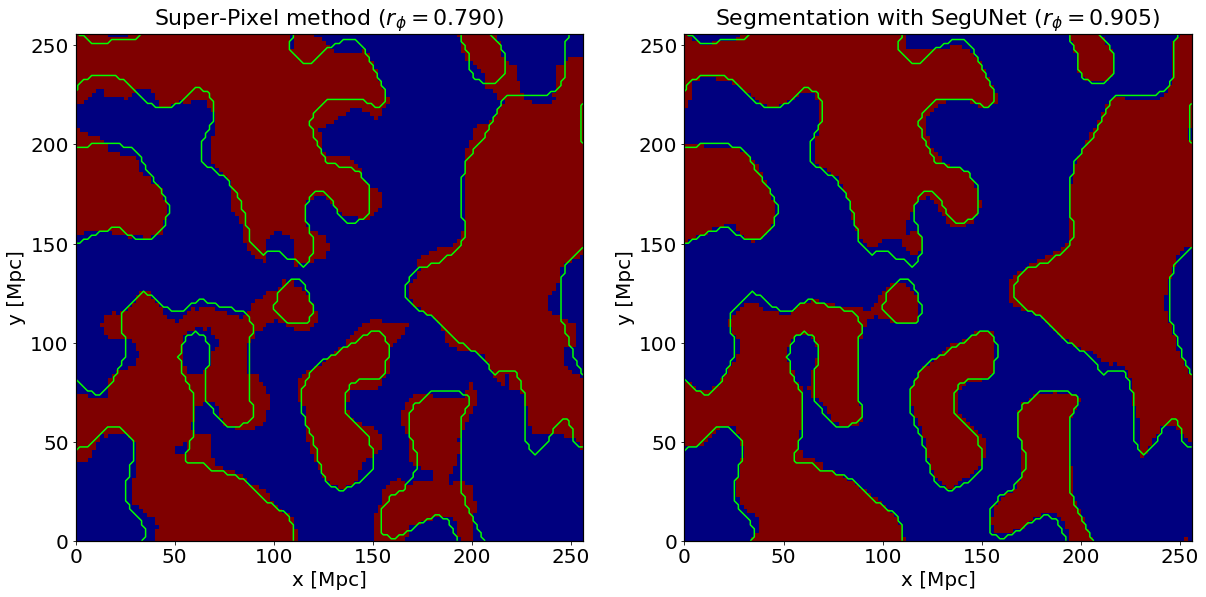

<Figure size 1440x720 with 0 Axes>

In [22]:
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['figure.figsize'] = [20, 10]

idx = params['HII_DIM']//2

plt.subplot(121)
plt.title('Super-Pixel method ($r_{\phi}=%.3f$)' %phicoef_sp, size=ls)
plt.imshow(X_sp[:,idx,:], origin='lower', cmap='jet', extent=my_ext)
plt.contour(mask_xn[:,idx,:], colors='lime', levels=[0.5], extent=my_ext)
plt.xlabel('x [Mpc]'), plt.ylabel('y [Mpc]')
plt.subplot(122)
plt.title('Segmentation with SegUNet ($r_{\phi}=%.3f$)' %phicoef_seg, size=ls)
plt.imshow(X_seg[:,idx,:], origin='lower', cmap='jet', extent=my_ext)
plt.contour(mask_xn[:,idx,:], colors='lime', levels=[0.5], extent=my_ext)
plt.xlabel('x [Mpc]'), plt.ylabel('y [Mpc]')
#plt.savefig(outpath+'visual_comparison_240Mpc_z%.3f_r2.057.png' %z, bbox_inches='tight')
plt.savefig(outpath+'visual_comparison_i%d.png' %index, bbox_inches='tight')
plt.show()
plt.clf()

## SegUnet Standard-Deviation error 

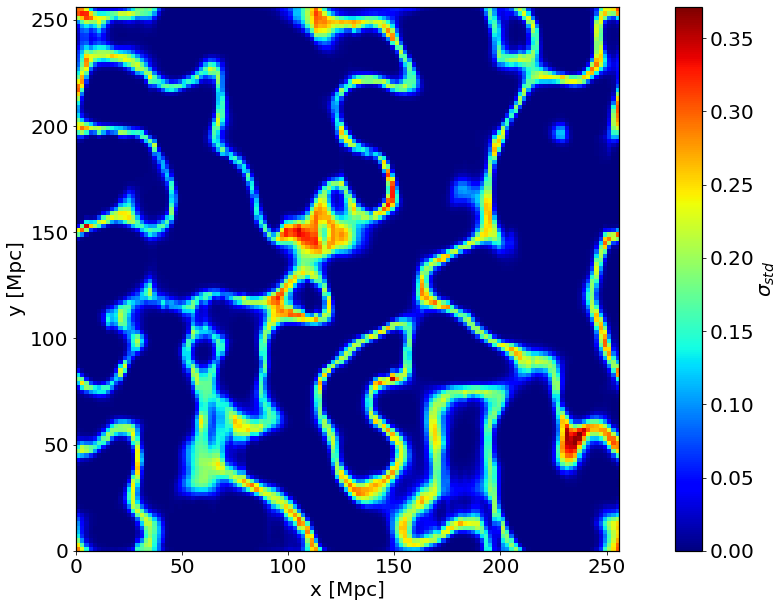

In [24]:
X_seg_err = np.std(X_tta, axis=0)

plt.figure(figsize=(10,5))
im = plt.imshow(X_seg_err[:,params['HII_DIM']//2,:], origin='lower', cmap='jet', extent=my_ext, interpolation='nearest')
plt.colorbar(im, label=r'$\sigma_{std}$')
plt.xlabel('x [Mpc]'), plt.ylabel('y [Mpc]')
plt.savefig(outpath+'visual_error_i%d.png' %index, bbox_inches='tight')

## BSD - MFP

In [ ]:
mfp_pred_ml = t2c.bubble_stats.mfp(X_seg, xth=0.5, boxsize=params['BOX_LEN'], iterations=2000000, verbose=False, upper_lim=False, bins=None, r_min=None, r_max=None)
mfp_pred_sp = t2c.bubble_stats.mfp(X_sp, xth=0.5, boxsize=params['BOX_LEN'], iterations=2000000, verbose=False, upper_lim=False, bins=None, r_min=None, r_max=None)
mfp_true = t2c.bubble_stats.mfp(mask_xn, xth=0.5, boxsize=params['BOX_LEN'], iterations=2000000, verbose=False, upper_lim=False, bins=None, r_min=None, r_max=None)  

mfp_tta = np.zeros((X_tta.shape[0], 2, 128))
for i in tqdm(range(0, X_tta.shape[0])):
    mfp_pred_ml1, mfp_pred_ml2 = t2c.bubble_stats.mfp(np.round(X_tta[i]), xth=0.5, boxsize=params['BOX_LEN'], iterations=2000000, verbose=False, upper_lim=False, bins=None, r_min=None, r_max=None)
    mfp_tta[i,0] = mfp_pred_ml1
    mfp_tta[i,1] = mfp_pred_ml2

MFP method applied on 3D data (ver 1.0)
Completed: 100.0%
Program runtime: 0.421177 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%
Program runtime: 0.444500 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

  0%|          | 0/96 [00:00<?, ?it/s]


Program runtime: 0.417171 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

  1%|          | 1/96 [00:24<38:18, 24.19s/it]


Program runtime: 0.403066 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

  2%|▏         | 2/96 [00:49<38:39, 24.67s/it]


Program runtime: 0.429716 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

  3%|▎         | 3/96 [01:13<37:53, 24.44s/it]


Program runtime: 0.398224 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

  4%|▍         | 4/96 [01:38<37:32, 24.48s/it]


Program runtime: 0.409178 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

  5%|▌         | 5/96 [02:01<36:32, 24.10s/it]


Program runtime: 0.386536 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

  6%|▋         | 6/96 [02:28<37:25, 24.95s/it]


Program runtime: 0.448987 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

  7%|▋         | 7/96 [02:56<38:08, 25.72s/it]


Program runtime: 0.458300 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

  8%|▊         | 8/96 [03:24<39:02, 26.62s/it]


Program runtime: 0.478419 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

  9%|▉         | 9/96 [03:50<38:20, 26.44s/it]


Program runtime: 0.433867 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 10%|█         | 10/96 [04:17<37:54, 26.45s/it]


Program runtime: 0.440873 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 11%|█▏        | 11/96 [04:42<37:07, 26.21s/it]


Program runtime: 0.427298 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 12%|█▎        | 12/96 [05:10<37:25, 26.73s/it]


Program runtime: 0.465750 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 14%|█▎        | 13/96 [05:35<36:13, 26.18s/it]


Program runtime: 0.414923 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 15%|█▍        | 14/96 [06:03<36:30, 26.71s/it]


Program runtime: 0.465579 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 16%|█▌        | 15/96 [06:28<35:25, 26.24s/it]


Program runtime: 0.418711 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 17%|█▋        | 16/96 [06:55<35:08, 26.36s/it]


Program runtime: 0.443794 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 18%|█▊        | 17/96 [07:19<33:56, 25.77s/it]


Program runtime: 0.406677 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 19%|█▉        | 18/96 [07:44<33:04, 25.45s/it]


Program runtime: 0.411216 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 20%|█▉        | 19/96 [08:08<32:10, 25.07s/it]


Program runtime: 0.403103 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 21%|██        | 20/96 [08:33<31:40, 25.01s/it]


Program runtime: 0.414417 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 22%|██▏       | 21/96 [08:57<30:39, 24.53s/it]


Program runtime: 0.389634 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 23%|██▎       | 22/96 [09:21<30:08, 24.44s/it]


Program runtime: 0.403700 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 24%|██▍       | 23/96 [09:44<29:18, 24.08s/it]


Program runtime: 0.387500 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 25%|██▌       | 24/96 [10:09<29:18, 24.43s/it]


Program runtime: 0.420411 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 26%|██▌       | 25/96 [10:34<28:50, 24.38s/it]


Program runtime: 0.404270 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 27%|██▋       | 26/96 [10:57<28:15, 24.21s/it]


Program runtime: 0.396986 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 28%|██▊       | 27/96 [11:21<27:38, 24.04s/it]


Program runtime: 0.393703 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 29%|██▉       | 28/96 [11:45<27:08, 23.95s/it]


Program runtime: 0.395515 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 30%|███       | 29/96 [12:12<27:45, 24.85s/it]


Program runtime: 0.449060 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 31%|███▏      | 30/96 [12:36<27:14, 24.76s/it]


Program runtime: 0.408931 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 32%|███▏      | 31/96 [13:04<27:41, 25.56s/it]


Program runtime: 0.457029 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 33%|███▎      | 32/96 [13:29<27:05, 25.39s/it]


Program runtime: 0.416562 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 34%|███▍      | 33/96 [13:53<26:10, 24.93s/it]


Program runtime: 0.397054 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 35%|███▌      | 34/96 [14:17<25:36, 24.78s/it]


Program runtime: 0.407066 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 36%|███▋      | 35/96 [14:45<26:07, 25.70s/it]


Program runtime: 0.464264 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 38%|███▊      | 36/96 [15:09<25:18, 25.31s/it]


Program runtime: 0.406519 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 39%|███▊      | 37/96 [15:33<24:30, 24.92s/it]


Program runtime: 0.399763 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 40%|███▉      | 38/96 [16:00<24:30, 25.35s/it]


Program runtime: 0.439053 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 41%|████      | 39/96 [16:24<23:52, 25.13s/it]


Program runtime: 0.410300 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 42%|████▏     | 40/96 [16:51<23:49, 25.53s/it]


Program runtime: 0.440988 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 43%|████▎     | 41/96 [17:18<23:57, 26.13s/it]


Program runtime: 0.458661 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 44%|████▍     | 42/96 [17:45<23:44, 26.37s/it]


Program runtime: 0.448694 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)
Completed: 100.0%

 45%|████▍     | 43/96 [18:15<24:08, 27.32s/it]


Program runtime: 0.492147 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
MFP method applied on 3D data (ver 1.0)


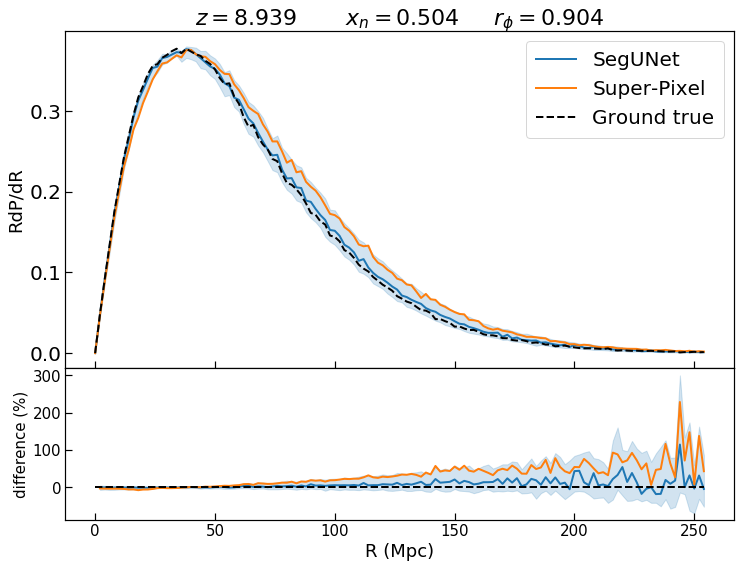

(None, None)

<Figure size 1440x720 with 0 Axes>

In [54]:
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

compare_ml = 100*(mfp_pred_ml[1]/mfp_true[1] - 1.)
compare_ml_tta = 100*(mfp_tta[:,1,:]/mfp_true[1] - 1.)
compare_sp = 100*(mfp_pred_sp[1]/mfp_true[1] - 1.)

# PLOTS
fig, ax0 = plt.subplots(figsize=(12, 9))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1.8]) # set height ratios for sublots

# THE FIRST SUBPLOT
ax0 = plt.subplot(gs[0])
ax0.set_title('$z=%.3f$\t$x_n=%.3f$\t$r_{\phi}=%.3f$' %(z, np.mean(xH), phicoef_seg), fontsize=ls)
ax0.fill_between(mfp_pred_ml[0], np.min(mfp_tta[:,1,:], axis=0), np.max(mfp_tta[:,1,:], axis=0), color='tab:blue', alpha=0.2)
ax0.plot(mfp_pred_ml[0], mfp_pred_ml[1], '-', color='tab:blue', label='SegUNet', lw=2)
ax0.plot(mfp_pred_sp[0], mfp_pred_sp[1], '-', color='tab:orange', label='Super-Pixel', lw=2)
ax0.plot(mfp_true[0], mfp_true[1], 'k--', label='Ground true', lw=2)
ax0.legend(loc=0, borderpad=0.5)
ax0.tick_params(axis='both', length=7, width=1.2)
ax0.tick_params(axis='both', which='minor', length=5, width=1.2)
ax0.set_ylabel('RdP/dR', size=18), ax0.set_xlabel('R (Mpc)')

# THE SECOND SUBPLOT
ax1 = plt.subplot(gs[1], sharex=ax0)
ax1.plot(mfp_true[0], compare_ml, '-', lw=2)
ax1.plot(mfp_true[0], compare_sp, '-', lw=2)
ax1.plot(mfp_true[0], np.zeros_like(mfp_true[0]), 'k--', lw=2)
ax1.fill_between(mfp_true[0], np.min(compare_ml_tta, axis=0), np.max(compare_ml_tta, axis=0), color='tab:blue', alpha=0.2)
ax1.tick_params(axis='both', length=7, width=1.2, labelsize=15)
ax1.set_ylabel('difference (%)', size=15)
ax1.set_xlabel('R (Mpc)', size=18)

# PLOT SETUP
plt.setp(ax0.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=0.0)
ax1.tick_params(which='minor', axis='both', length=5, width=1.2)
#plt.savefig(outpath+'bs_comparison_240Mpc_z%.3f_r2.057.png' %z, bbox_inches='tight')
plt.savefig(outpath+'bs_comparison_i%d.png' %index, bbox_inches='tight')
plt.show(), plt.clf()

# Calculate the Power Spectra

In [41]:
ps_true, ks_true = t2c.power_spectrum_1d(mask_xn, kbins=20, box_dims=256, binning='log')
ps_pred_sp, ks_pred_sp = t2c.power_spectrum_1d(X_sp, kbins=20, box_dims=256, binning='log')
ps_pred_ml, ks_pred_ml = t2c.power_spectrum_1d(X_seg, kbins=20, box_dims=256, binning='log')

ps_tta = np.zeros((X_tta.shape[0],20))
for i in range(0,X_tta.shape[0]):
    ps_tta[i], ks_pred_ml = t2c.power_spectrum_1d(np.round(X_tta[i]), kbins=20, box_dims=256, binning='log')


In [42]:
compare_ml = 100*(ps_pred_ml/ps_true - 1.)
compare_ml_tta = 100*(ps_tta/ps_true - 1.)
compare_sp = 100*(ps_pred_sp/ps_true - 1.)

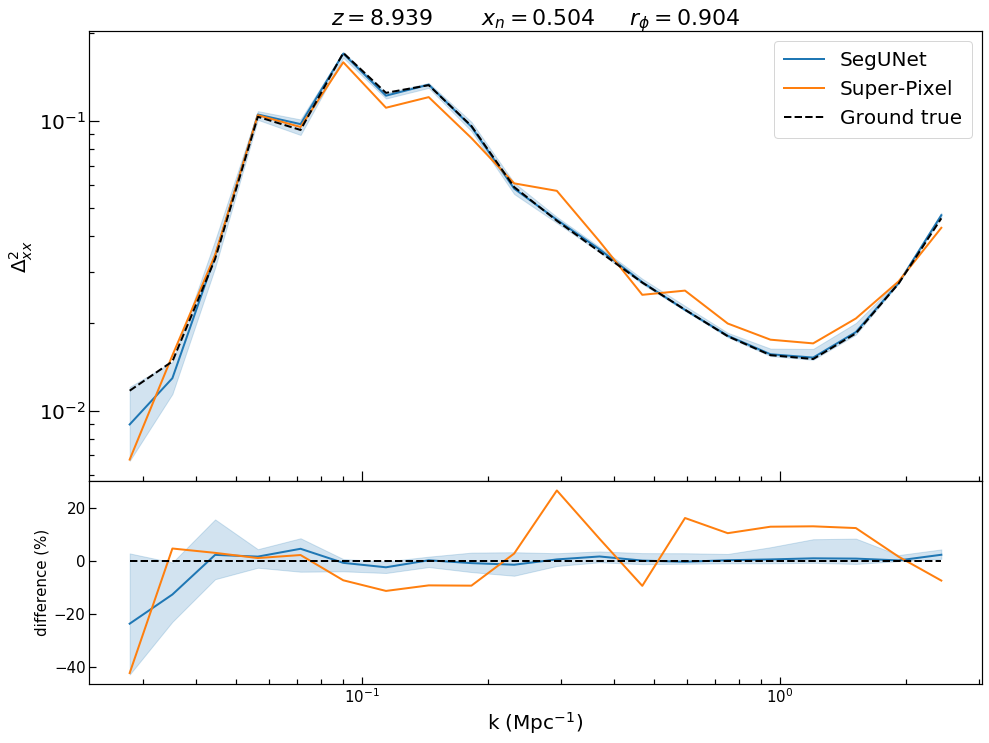

<Figure size 1440x720 with 0 Axes>

In [43]:
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

fig, ax = plt.subplots(figsize=(16, 12))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1.8])
ax0 = plt.subplot(gs[0])
ax0.set_title('$z=%.3f$\t$x_n=%.3f$\t$r_{\phi}=%.3f$' %(z, np.mean(xH), phicoef_seg), fontsize=ls)
ax0.fill_between(ks_pred_ml, np.min(ps_tta*ks_pred_ml**3/2/np.pi**2, axis=0), np.max(ps_tta*ks_pred_ml**3/2/np.pi**2, axis=0), color='tab:blue', alpha=0.2)
ax0.loglog(ks_pred_ml, ps_pred_ml*ks_pred_ml**3/2/np.pi**2, '-', color='tab:blue', label='SegUNet', lw=2)
ax0.loglog(ks_pred_sp, ps_pred_sp*ks_pred_sp**3/2/np.pi**2, '-', color='tab:orange', label='Super-Pixel', lw=2)
ax0.loglog(ks_true, ps_true*ks_true**3/2/np.pi**2, 'k--', label='Ground true', lw=2)
ax0.set_yscale('log')
# THE SECOND SUBPLOT 
ax1 = plt.subplot(gs[1], sharex=ax0)
ax1.semilogx(ks_true, compare_ml, '-', lw=2)
ax1.semilogx(ks_true, compare_sp, '-', lw=2)
ax1.semilogx(ks_true, np.zeros_like(ks_true), 'k--', lw=2)
ax1.fill_between(ks_true, np.min(compare_ml_tta, axis=0), np.max(compare_ml_tta, axis=0), color='tab:blue', alpha=0.2)

# PLOT SETUP
ax1.tick_params(axis='both', length=7, width=1.2, labelsize=15)
ax1.set_xlabel('k (Mpc$^{-1}$)'), ax0.set_ylabel('$\Delta^2_{xx}$')
ax1.set_ylabel('difference (%)', size=15)
ax0.tick_params(axis='both', length=10, width=1.2)
ax0.tick_params(which='minor', axis='both', length=5, width=1.2)
ax1.tick_params(which='minor', axis='both', length=5, width=1.2)
ax0.legend(loc=0, borderpad=0.5)
plt.setp(ax0.get_xticklabels(), visible=False)
#plt.savefig(outpath+'Pk_comparison_240Mpc_z%.3f_r2.057.png' %z, bbox_inches='tight')
plt.savefig(outpath+'Pk_comparison_i%d.png' %index, bbox_inches='tight')
plt.subplots_adjust(hspace=0.0)
plt.show()
plt.clf()